In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df =pd.read_csv('churn.csv')
df

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7041,5067-WJEUN,NaN,0.0,Yes,Yes,67.0,Two year,Yes,Bank transfer (automatic),54.20,3838.20,No
7042,3866-MDTUB,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.75,146.90,Yes
7043,8434-PNQZX,Female,0.0,No,No,42.0,Two year,Yes,Credit card (automatic),78.45,3373.40,No
7044,2921-XWDJH,Female,1.0,Yes,No,38.0,Month-to-month,Yes,Electronic check,83.45,3147.15,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB


# Data preprocesing

### Missing value and duplicates data

In [85]:
df.isna().sum()/len(df)*100

customerID          0.127732
Gender              0.227079
SeniorCitizen       0.170309
Partner             0.227079
Dependents          0.269657
Tenure              0.241272
Contract            0.184502
PaperlessBilling    0.184502
PaymentMethod       0.156117
MonthlyCharges      0.141924
TotalCharges        0.000000
Churn               0.000000
dtype: float64

presentase data null < 10%, maka akan saya hapus

In [86]:
data = df.dropna()

In [87]:
data.isna().sum()

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [88]:
data.duplicated().sum()

13

In [89]:
data = data.drop_duplicates()

In [90]:
data.duplicated().sum()

0

### Data understanding

In [91]:
kategorikal = list(data.select_dtypes( include = 'object'))
numerikal = list(data.select_dtypes(exclude = 'object'))

In [30]:
kategorikal

['customerID',
 'Gender',
 'Partner',
 'Dependents',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [31]:
numerikal

['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']

In [33]:
data[numerikal].describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,6898.000000,6898.000000,6898.000000,6898.000000
mean,0.161931,32.433749,64.839439,2286.277320
std,0.368414,24.528786,30.100388,2265.938904
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.550000,401.150000
50%,0.000000,29.000000,70.400000,1400.700000
75%,0.000000,55.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


secara keseluruhan, data normal. Ada distribusi skew di kolom TotalChareges

In [36]:
data[kategorikal].describe()

,customerID,Gender,Partner,Dependents,Contract,PaperlessBilling,PaymentMethod,Churn
count,6898,6898,6898,6898,6898,6898,6898,6898
unique,6898,2,2,2,3,2,4,2
top,5575-GNVDE,Male,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3488,3573,4845,3803,4088,2309,5073


In [60]:
data['Churn'].value_counts()

No     5073
Yes    1825
Name: Churn, dtype: int64

data imbalance, saya akan menggunakan evaluation metric recall. Karena jika ada potensi customer churn, bisa lebih kedeteksi dan bisa melakukan tindakan mitigasi 

### Encoding 

In [92]:
data

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0.0,No,No,8.0,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0.0,Yes,Yes,24.0,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0.0,Yes,Yes,72.0,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0.0,Yes,Yes,11.0,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1.0,Yes,No,4.0,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [93]:
map_class = {
    'Yes' : 1,
    'No' : 0
}

data['Partner'] = data['Partner'].map(map_class)
data['Dependents'] = data['Dependents'].map(map_class)
data['PaperlessBilling'] = data['PaperlessBilling'].map(map_class)


In [94]:
map_gender = {
    'Male' : 1,
    'Female' : 0
}

data['Gender'] = data['Gender'].map(map_gender)

In [95]:
# ordinal encoding
map_contract = {
    'Month-to-month' : 1,
    'One year' : 2,
    'Two year' : 3
    
}

data['Contract'] = data['Contract'].map(map_contract)

In [96]:
data

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,1,0.0,0,0,34.0,2,0,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0.0,0,0,2.0,1,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0.0,0,0,45.0,2,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0.0,0,0,2.0,1,1,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,0,0.0,0,0,8.0,1,1,Electronic check,99.65,820.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0.0,1,1,24.0,2,1,Mailed check,84.80,1990.50,No
7028,2234-XADUH,0,0.0,1,1,72.0,2,1,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,0,0.0,1,1,11.0,1,1,Electronic check,29.60,346.45,No
7030,8361-LTMKD,1,1.0,1,0,4.0,1,1,Mailed check,74.40,306.60,Yes


saya akan menghapus kolom customerID dan PaymentMethod. Mneurut saya metode pembayaran tidak terlalu mempengaruhi customer untuk churn

In [97]:
data = data.drop(['customerID','PaymentMethod'], axis = 1)

In [98]:
data

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
1,1,0.0,0,0,34.0,2,0,56.95,1889.50,No
2,1,0.0,0,0,2.0,1,1,53.85,108.15,Yes
3,1,0.0,0,0,45.0,2,0,42.30,1840.75,No
4,0,0.0,0,0,2.0,1,1,70.70,151.65,Yes
5,0,0.0,0,0,8.0,1,1,99.65,820.50,Yes
...,...,...,...,...,...,...,...,...,...,...
7027,1,0.0,1,1,24.0,2,1,84.80,1990.50,No
7028,0,0.0,1,1,72.0,2,1,103.20,7362.90,No
7029,0,0.0,1,1,11.0,1,1,29.60,346.45,No
7030,1,1.0,1,0,4.0,1,1,74.40,306.60,Yes


### Data scaling

In [207]:
x = data.drop(['Churn'],axis = 1)
y = data['Churn']

In [208]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(x)
feats = list(x)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,0.988756,-0.439567,-0.964671,-0.650950,0.063858,0.374193,-1.206153,-0.262123,-0.175118
1,0.988756,-0.439567,-0.964671,-0.650950,-1.240826,-0.826358,0.829082,-0.365119,-0.961317
2,0.988756,-0.439567,-0.964671,-0.650950,0.512343,0.374193,-1.206153,-0.748863,-0.196634
3,-1.011372,-0.439567,-0.964671,-0.650950,-1.240826,-0.826358,0.829082,0.194715,-0.942118
4,-1.011372,-0.439567,-0.964671,-0.650950,-0.996198,-0.826358,0.829082,1.156566,-0.646921
...,...,...,...,...,...,...,...,...,...
6893,0.988756,-0.439567,1.036623,1.536216,-0.343856,0.374193,0.829082,0.663181,-0.130541
6894,-1.011372,-0.439567,1.036623,1.536216,1.613171,0.374193,0.829082,1.274513,2.240568
6895,-1.011372,-0.439567,1.036623,1.536216,-0.873884,-0.826358,0.829082,-1.170815,-0.856143
6896,0.988756,2.274966,1.036623,-0.650950,-1.159283,-0.826358,0.829082,0.317646,-0.873731


# Modeling

### Split the data

In [209]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_std,
                                                  y,
                                                  test_size=0.3,
                                                  random_state = 42)

In [210]:
from sklearn.ensemble import RandomForestClassifier

rd_forest = RandomForestClassifier(random_state = 42)

In [223]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

scoring = {'accuracy': make_scorer(recall_score),
           'prec': 'precision'}

parameters = {
    'n_estimators': (10,20,30,35,36,37,38,39),
    'max_depth':(1,2,3,4,5,6,7,8)
}

rd_forest_cv = RandomizedSearchCV(rd_forest,parameters, cv =5, scoring = 'accuracy')
rd_forest_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': (1, 2, 3, 4, 5, 6, 7, 8),
                                        'n_estimators': (10, 20, 30, 35, 36, 37,
                                                         38, 39)},
                   scoring='accuracy')

In [224]:
cv_result = pd.DataFrame(rd_forest_cv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
9,"{'n_estimators': 39, 'max_depth': 7}",0.798676,1
0,"{'n_estimators': 39, 'max_depth': 8}",0.797018,2
8,"{'n_estimators': 37, 'max_depth': 8}",0.796397,3
7,"{'n_estimators': 20, 'max_depth': 7}",0.795155,4
2,"{'n_estimators': 10, 'max_depth': 8}",0.794532,5
6,"{'n_estimators': 10, 'max_depth': 2}",0.762842,6
3,"{'n_estimators': 36, 'max_depth': 2}",0.757042,7
1,"{'n_estimators': 20, 'max_depth': 2}",0.756213,8
4,"{'n_estimators': 10, 'max_depth': 1}",0.735915,9
5,"{'n_estimators': 35, 'max_depth': 1}",0.735915,9


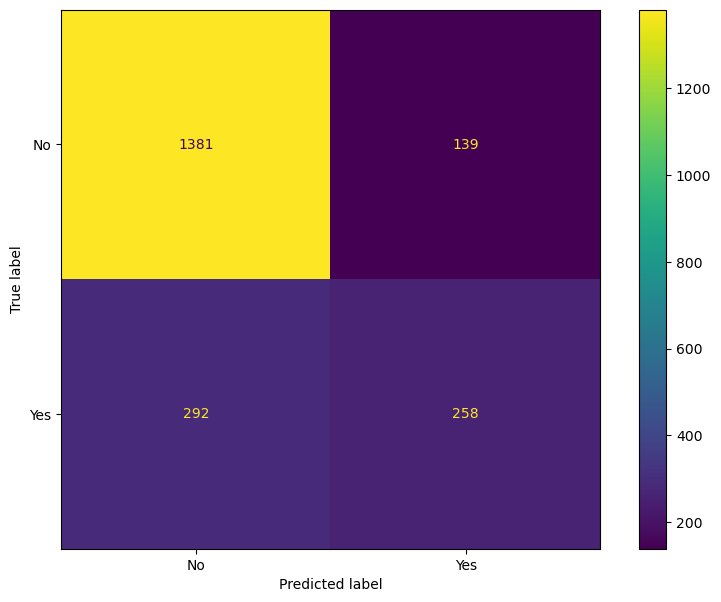

In [226]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rd_forest_cv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rd_forest_cv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rd_forest_cv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [228]:
y_pred = rd_forest_cv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1520
         Yes       0.65      0.47      0.54       550

    accuracy                           0.79      2070
   macro avg       0.74      0.69      0.70      2070
weighted avg       0.78      0.79      0.78      2070

